In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import arch
from arch import arch_model
import data_reader as dr

In [2]:
data = dr.read()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 2484 non-null   object 
 1   Daily_trading_range  2478 non-null   float64
 2   Log_Volume_change    2471 non-null   float64
 3   Daily_return         2483 non-null   float64
 4   Daily_log_return     2471 non-null   float64
 5   Index                2478 non-null   float64
 6   Past_vol22           2342 non-null   float64
 7   gold                 2462 non-null   float64
 8   oil                  2463 non-null   float64
 9   Target22             2342 non-null   float64
 10  Target10             2414 non-null   float64
dtypes: float64(10), object(1)
memory usage: 213.6+ KB


In [3]:
data.head(50)


,Date,Daily_trading_range,Log_Volume_change,Daily_return,Daily_log_return,Index,Past_vol22,gold,oil,Target22,Target10
0,2010-12-01,24.609985,NaN,NaN,NaN,1929.319946,NaN,1387.300049,86.750000,NaN,NaN
1,2010-12-02,10.030030,25.790951,0.010854,0.010795,1950.260010,NaN,1388.500000,88.000000,NaN,NaN
2,2010-12-03,12.099975,-0.091158,0.003589,0.003583,1957.260010,NaN,1405.400024,89.190002,NaN,NaN
3,2010-12-06,15.119995,4.829061,-0.001850,-0.001851,1953.640015,NaN,1415.300049,89.379997,NaN,NaN
4,2010-12-07,12.079956,32.833894,0.004545,0.004535,1962.520020,NaN,1408.300049,88.690002,NaN,NaN
5,2010-12-08,16.940063,-25.283534,-0.003465,-0.003471,1955.719971,NaN,1382.500000,88.279999,NaN,NaN
6,2010-12-09,27.279907,-10.191940,0.016996,0.016853,1988.959961,NaN,1392.099976,88.370003,NaN,NaN
7,2010-12-10,12.229981,-18.147427,-0.001418,-0.001419,1986.140015,NaN,1384.300049,87.790001,NaN,NaN
8,2010-12-13,13.429931,3.081218,0.005261,0.005248,1996.589966,NaN,1397.300049,88.610001,NaN,NaN
9,2010-12-14,12.230103,2.812765,0.006241,0.006221,2009.050049,NaN,1403.599976,88.279999,NaN,NaN


In [8]:
data_cleaned = data[22:]
data_cleaned = data_cleaned.dropna()

,Date,Daily_trading_range,Log_Volume_change,Daily_return,Daily_log_return,Index,Past_vol22,gold,oil,Target22,Target10
2454,2020-11-18,17.169922,-31.576271,0.002556,0.002553,2545.639893,0.219059,1967.599976,42.610001,0.187031,0.195590
2455,2020-11-19,19.419922,5.580395,0.000699,0.000699,2547.419922,0.219472,1968.199951,42.759998,0.186256,0.150259
2456,2020-11-20,18.419922,14.502424,0.002387,0.002384,2553.500000,0.219831,1934.400024,41.509998,0.185545,0.150671
2457,2020-11-23,51.880127,37.886469,0.019225,0.019042,2602.590088,0.222760,1927.599976,41.369999,0.195553,0.168500
2458,2020-11-24,23.489991,-18.932034,0.005829,0.005812,2617.760010,0.222281,1923.900024,39.770000,0.196404,0.170851
2459,2020-11-25,58.850098,3.287256,-0.006196,-0.006215,2601.540039,0.222460,1933.000000,36.759998,0.196007,0.158930
2460,2020-11-26,33.540039,-1.622913,0.009367,0.009324,2625.909912,0.221787,1944.699951,38.049999,0.197704,0.164970
2461,2020-11-27,16.530029,-14.844884,0.002871,0.002867,2633.449951,0.222299,1954.199951,37.299999,0.196797,0.161043
2462,2020-11-30,57.319824,9.241758,-0.015990,-0.016120,2591.340088,0.222580,1937.800049,37.330002,0.202699,0.150136
2463,2020-12-01,27.200195,-13.137746,0.016559,0.016423,2634.250000,0.202050,1953.099976,37.259998,0.190434,0.173286


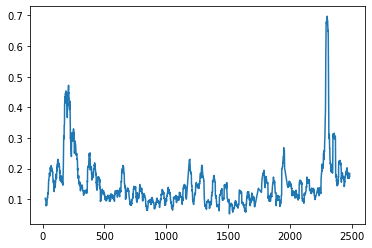

In [9]:
plt.plot(data_cleaned['Target22'])
plt.show()

In [8]:
logreturns = data_cleaned[['Daily_log_return']]
logreturns = logreturns.dropna()
testSize = int(len(logreturns)*0.8)

trainReturn = logreturns[:testSize]
testReturn = logreturns[testSize:]

trainReturn

,Daily_log_return
22,0.009260
23,0.007249
24,-0.001243
25,-0.002375
26,0.004126
...,...
1986,-0.003148
1987,-0.013226
1988,0.000212
1989,0.006193


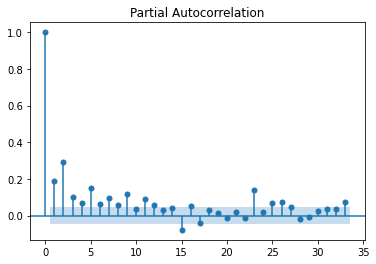

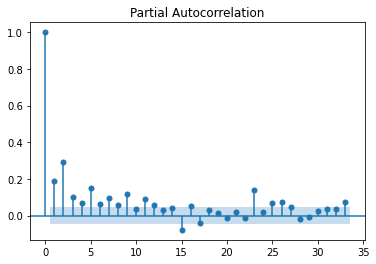

In [9]:
plot_pacf(trainReturn**2)


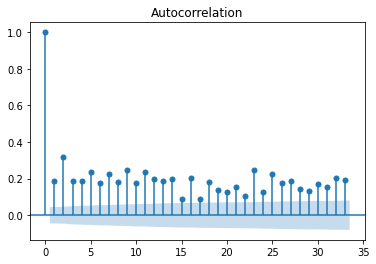

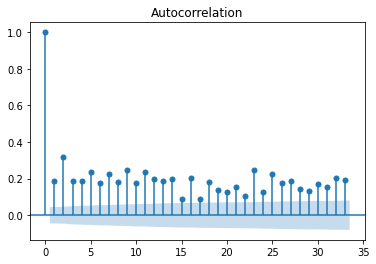

In [10]:
plot_acf(trainReturn**2)

pacf graph shows that the current KOSPI log return is related to prior time steps such as past 3 days
which are not within the significance region

To select proper GARCH model, the experiment starts with lag 3, then will choose the most
appropriate model.

In [14]:
lag1_model = arch_model(trainReturn*100, p=1, q=1)
lag1_model_fit = lag1_model.fit()
lag1_model_fit.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 12438.300140605399
Iteration:      2,   Func. Count:     15,   Neg. LLF: 661815.0621414211
Iteration:      3,   Func. Count:     25,   Neg. LLF: 2823.00928583353
Iteration:      4,   Func. Count:     32,   Neg. LLF: 50685.03734263893
Iteration:      5,   Func. Count:     38,   Neg. LLF: 2454.3660574246583
Iteration:      6,   Func. Count:     44,   Neg. LLF: 2434.6957227206926
Iteration:      7,   Func. Count:     50,   Neg. LLF: 2412.525142455522
Iteration:      8,   Func. Count:     55,   Neg. LLF: 2412.5069720389824
Iteration:      9,   Func. Count:     60,   Neg. LLF: 2412.5062280423053
Iteration:     10,   Func. Count:     65,   Neg. LLF: 2412.5061920149287
Iteration:     11,   Func. Count:     70,   Neg. LLF: 2412.5061881655247
Iteration:     12,   Func. Count:     74,   Neg. LLF: 2412.5061881658758
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2412.5061881655247
            Iteratio

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:       Daily_log_return   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -2412.51
Distribution:                  Normal   AIC:                           4833.01
Method:            Maximum Likelihood   BIC:                           4855.30
                                        No. Observations:                 1942
Date:                Wed, Mar 31 2021   Df Residuals:                     1938
Time:                        19:43:13   Df Model:                            4
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0147  1.738e-02      0.849      0.396 [-1.932e-02,4.881e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0207  8.223e-03      2.513  1.196e-02 [4.551e-03,3.678e-02]
alpha[1]       0.0783  1.908e-02      4.103  4.077e-05   [4.090e-02,  0.116]
beta[1]        0.8961  2.590e-02     34.602 2.364e-262     [  0.845,  0.947]
============================================================================

Covariance estimator: robust
"""

In [15]:
lag2_model = arch_model(trainReturn*100, p=2, q=2)
lag2_model_fit = lag2_model.fit()
lag2_model_fit.summary()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 406000.36323231406
Iteration:      2,   Func. Count:     19,   Neg. LLF: 43237949978.19492
Iteration:      3,   Func. Count:     29,   Neg. LLF: 3091.856554760266
Iteration:      4,   Func. Count:     38,   Neg. LLF: 2918.2946797807085
Iteration:      5,   Func. Count:     47,   Neg. LLF: 2436.247580847807
Iteration:      6,   Func. Count:     55,   Neg. LLF: 2423.958515884986
Iteration:      7,   Func. Count:     63,   Neg. LLF: 2416.0905862376653
Iteration:      8,   Func. Count:     71,   Neg. LLF: 2410.813296188435
Iteration:      9,   Func. Count:     79,   Neg. LLF: 2410.4735581707846
Iteration:     10,   Func. Count:     86,   Neg. LLF: 2410.4732185835164
Iteration:     11,   Func. Count:     93,   Neg. LLF: 2410.4731566067576
Iteration:     12,   Func. Count:    100,   Neg. LLF: 2410.4731559488946
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2410.4731559488946
            Iteratio

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:       Daily_log_return   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -2410.47
Distribution:                  Normal   AIC:                           4832.95
Method:            Maximum Likelihood   BIC:                           4866.38
                                        No. Observations:                 1942
Date:                Wed, Mar 31 2021   Df Residuals:                     1936
Time:                        19:43:14   Df Model:                            6
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0120  1.748e-02      0.684      0.494 [-2.230e-02,4.621e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0372  1.560e-02      2.384  1.712e-02  [6.617e-03,6.778e-02]
alpha[1]       0.0417  2.580e-02      1.618      0.106 [-8.830e-03,9.230e-02]
alpha[2]       0.0898  3.438e-02      2.611  9.037e-03    [2.237e-02,  0.157]
beta[1]        0.3572      0.219      1.632      0.103   [-7.169e-02,  0.786]
beta[2]        0.4649      0.199      2.333  1.962e-02    [7.442e-02,  0.855]
=============================================================================

Covariance estimator: robust
"""

In [16]:
lag3_model = arch_model(trainReturn*100, p=3, q=3)
lag3_model_fit = lag3_model.fit()
lag3_model_fit.summary()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 58492062921.7941
Iteration:      2,   Func. Count:     23,   Neg. LLF: 1275807480.4990382
Iteration:      3,   Func. Count:     35,   Neg. LLF: 4095.058628030108
Iteration:      4,   Func. Count:     45,   Neg. LLF: 2588.9101727562916
Iteration:      5,   Func. Count:     56,   Neg. LLF: 2711.378353723695
Iteration:      6,   Func. Count:     66,   Neg. LLF: 2484.030838275278
Iteration:      7,   Func. Count:     76,   Neg. LLF: 2444.1064184060688
Iteration:      8,   Func. Count:     86,   Neg. LLF: 2413.7077611659106
Iteration:      9,   Func. Count:     96,   Neg. LLF: 2419.3863192620884
Iteration:     10,   Func. Count:    106,   Neg. LLF: 2407.8671954230704
Iteration:     11,   Func. Count:    115,   Neg. LLF: 2409.6705996499177
Iteration:     12,   Func. Count:    125,   Neg. LLF: 2420.4729350822176
Iteration:     13,   Func. Count:    136,   Neg. LLF: 2407.448898528833
Iteration:     14,   Func. Count:    145,   Neg. LLF: 240

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:       Daily_log_return   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -2407.44
Distribution:                  Normal   AIC:                           4830.88
Method:            Maximum Likelihood   BIC:                           4875.46
                                        No. Observations:                 1942
Date:                Wed, Mar 31 2021   Df Residuals:                     1934
Time:                        19:43:14   Df Model:                            8
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         6.0744e-03  1.807e-02      0.336      0.737 [-2.934e-02,4.149e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0533  2.802e-02      1.903  5.701e-02 [-1.589e-03,  0.108]
alpha[1]       0.0501  3.124e-02      1.603      0.109 [-1.114e-02,  0.111]
alpha[2]       0.1296  3.629e-02      3.571  3.550e-04  [5.848e-02,  0.201]
alpha[3]       0.0151  5.738e-02      0.263      0.793 [-9.737e-02,  0.128]
beta[1]        0.0000      0.422      0.000      1.000    [ -0.828,  0.828]
beta[2]        0.1664      0.152      1.091      0.275    [ -0.132,  0.465]
beta[3]        0.5722      0.282      2.031  4.225e-02  [2.002e-02,  1.124]
===========================================================================

Covariance estimator: robust
"""

In [17]:
egm_lag1 = arch_model(trainReturn*100, p=1, q=1, o=1)
egm_lag1_fit = egm_lag1.fit()
egm_lag1_fit.summary()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 5685498017.758001
Iteration:      2,   Func. Count:     17,   Neg. LLF: 22431278993.26679
Iteration:      3,   Func. Count:     26,   Neg. LLF: 2700.459878947163
Iteration:      4,   Func. Count:     35,   Neg. LLF: 3284.9863690194925
Iteration:      5,   Func. Count:     44,   Neg. LLF: 2385.718497061416
Iteration:      6,   Func. Count:     50,   Neg. LLF: 2385.84162139643
Iteration:      7,   Func. Count:     57,   Neg. LLF: 2385.686881497975
Iteration:      8,   Func. Count:     63,   Neg. LLF: 2385.686546232834
Iteration:      9,   Func. Count:     68,   Neg. LLF: 2385.686546234644
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2385.686546232834
            Iterations: 9
            Function evaluations: 68
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                   Constant Mean - GJR-GARCH Model Results                    
==============================================================================
Dep. Variable:       Daily_log_return   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -2385.69
Distribution:                  Normal   AIC:                           4781.37
Method:            Maximum Likelihood   BIC:                           4809.23
                                        No. Observations:                 1942
Date:                Wed, Mar 31 2021   Df Residuals:                     1937
Time:                        19:43:14   Df Model:                            5
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -7.6327e-03  1.744e-02     -0.438      0.662 [-4.181e-02,2.654e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0212  7.902e-03      2.687  7.209e-03  [5.746e-03,3.672e-02]
alpha[1]   7.9851e-14  1.427e-02  5.597e-12      1.000 [-2.796e-02,2.796e-02]
gamma[1]       0.1133  2.861e-02      3.961  7.472e-05    [5.723e-02,  0.169]
beta[1]        0.9129  2.527e-02     36.132 7.031e-286      [  0.863,  0.962]
=============================================================================

Covariance estimator: robust
"""

In [18]:
egm_lag2 = arch_model(trainReturn*100, p=2, q=2, o=2)
egm_lag2_fit = egm_lag2.fit()
egm_lag2_fit.summary()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 9291.232756904112
Iteration:      2,   Func. Count:     23,   Neg. LLF: 3403.9061194320084
Iteration:      3,   Func. Count:     34,   Neg. LLF: 78866.3876625899
Iteration:      4,   Func. Count:     46,   Neg. LLF: 3397.6132640579863
Iteration:      5,   Func. Count:     57,   Neg. LLF: 2463.7063321424994
Iteration:      6,   Func. Count:     67,   Neg. LLF: 2430.8621043164007
Iteration:      7,   Func. Count:     77,   Neg. LLF: 2400.0489866900803
Iteration:      8,   Func. Count:     87,   Neg. LLF: 2386.0760414356505
Iteration:      9,   Func. Count:     96,   Neg. LLF: 2394.7460537873585
Iteration:     10,   Func. Count:    106,   Neg. LLF: 2386.249245448815
Iteration:     11,   Func. Count:    116,   Neg. LLF: 2386.0669152619985
Iteration:     12,   Func. Count:    126,   Neg. LLF: 2386.2224755456855
Iteration:     13,   Func. Count:    136,   Neg. LLF: 2386.3205444516816
Iteration:     14,   Func. Count:    146,   Neg. LLF: 2

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Constant Mean - GJR-GARCH Model Results                    
==============================================================================
Dep. Variable:       Daily_log_return   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -2385.66
Distribution:                  Normal   AIC:                           4787.32
Method:            Maximum Likelihood   BIC:                           4831.89
                                        No. Observations:                 1942
Date:                Wed, Mar 31 2021   Df Residuals:                     1934
Time:                        19:43:15   Df Model:                            8
                                Mean Model                               
=========================================================================
                  coef    std err          t      P>|t|  95.0% Conf. Int.
-------------------------------------------------------------------------
mu         -7.6595e-03      0.200 -3.837e-02      0.969 [ -0.399,  0.384]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0369      1.395  2.644e-02      0.979      [ -2.697,  2.771]
alpha[1]       0.0000      2.374      0.000      1.000      [ -4.654,  4.654]
alpha[2]   1.5239e-11      2.545  5.988e-12      1.000      [ -4.988,  4.988]
gamma[1]       0.1078      1.449  7.437e-02      0.941      [ -2.732,  2.948]
gamma[2]       0.0880      9.493  9.267e-03      0.993      [-18.517, 18.693]
beta[1]        0.1900     71.650  2.651e-03      0.998 [-1.402e+02,1.406e+02]
beta[2]        0.6593     65.818  1.002e-02      0.992 [-1.283e+02,1.297e+02]
=============================================================================

Covariance estimator: robust
"""

In [19]:
egm_lag3 = arch_model(trainReturn*100, p=3, q=3, o=3)
egm_lag3_fit = egm_lag3.fit()
egm_lag3_fit.summary()

Iteration:      1,   Func. Count:     13,   Neg. LLF: 4943.092175057092
Iteration:      2,   Func. Count:     30,   Neg. LLF: 537269.6324741037
Iteration:      3,   Func. Count:     46,   Neg. LLF: 3683.862841307938
Iteration:      4,   Func. Count:     60,   Neg. LLF: 3488.903357620673
Iteration:      5,   Func. Count:     74,   Neg. LLF: 2502.046766663483
Iteration:      6,   Func. Count:     87,   Neg. LLF: 2414.8923702549
Iteration:      7,   Func. Count:    100,   Neg. LLF: 2409.5668604252915
Iteration:      8,   Func. Count:    113,   Neg. LLF: 2418.5415454917897
Iteration:      9,   Func. Count:    127,   Neg. LLF: 2498.632203723755
Iteration:     10,   Func. Count:    140,   Neg. LLF: 2385.422194413428
Iteration:     11,   Func. Count:    152,   Neg. LLF: 2389.4732365744935
Iteration:     12,   Func. Count:    165,   Neg. LLF: 2385.081543559831
Iteration:     13,   Func. Count:    177,   Neg. LLF: 2385.0522387603696
Iteration:     14,   Func. Count:    189,   Neg. LLF: 2385.026

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Constant Mean - GJR-GARCH Model Results                    
==============================================================================
Dep. Variable:       Daily_log_return   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -2384.98
Distribution:                  Normal   AIC:                           4791.97
Method:            Maximum Likelihood   BIC:                           4853.26
                                        No. Observations:                 1942
Date:                Wed, Mar 31 2021   Df Residuals:                     1931
Time:                        19:43:15   Df Model:                           11
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -9.1482e-03  1.767e-02     -0.518      0.605 [-4.377e-02,2.548e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0555  2.335e-02      2.377  1.743e-02    [9.749e-03,  0.101]
alpha[1]   2.5275e-10  2.099e-02  1.204e-08      1.000 [-4.114e-02,4.114e-02]
alpha[2]       0.0270  1.740e-02      1.552      0.121 [-7.095e-03,6.110e-02]
alpha[3]   1.8416e-10  2.788e-02  6.604e-09      1.000 [-5.465e-02,5.465e-02]
gamma[1]       0.1148  4.123e-02      2.784  5.369e-03    [3.397e-02,  0.196]
gamma[2]       0.0886  3.684e-02      2.406  1.614e-02    [1.642e-02,  0.161]
gamma[3]       0.0643  4.917e-02      1.307      0.191   [-3.210e-02,  0.161]
beta[1]        0.0000      0.202      0.000      1.000      [ -0.395,  0.395]
beta[2]        0.1597      0.194      0.824      0.410      [ -0.220,  0.540]
beta[3]        0.6011      0.210      2.861  4.220e-03      [  0.189,  1.013]
=============================================================================

Covariance estimator: robust
"""

In [20]:
garch_tuned = arch_model(trainReturn*100, p=2, q=3, dist='skewt')
garch_tuned_fit = garch_tuned.fit()
garch_tuned_fit.summary()

Iteration:      1,   Func. Count:     11,   Neg. LLF: 146459.9625596793
Iteration:      2,   Func. Count:     25,   Neg. LLF: 248331.10985674552
Iteration:      3,   Func. Count:     37,   Neg. LLF: 46373.48686600601
Iteration:      4,   Func. Count:     48,   Neg. LLF: 10512.402508225598
Iteration:      5,   Func. Count:     60,   Neg. LLF: 4179.1849475492
Iteration:      6,   Func. Count:     71,   Neg. LLF: 8517.009303242357
Iteration:      7,   Func. Count:     83,   Neg. LLF: 3356.922826684732
Iteration:      8,   Func. Count:     94,   Neg. LLF: 2382.3833551413663
Iteration:      9,   Func. Count:    105,   Neg. LLF: 2395.2316798846946
Iteration:     10,   Func. Count:    116,   Neg. LLF: 2369.3981391834086
Iteration:     11,   Func. Count:    127,   Neg. LLF: 2370.608668318414
Iteration:     12,   Func. Count:    138,   Neg. LLF: 2366.8969154214974
Iteration:     13,   Func. Count:    149,   Neg. LLF: 2367.1547940749415
Iteration:     14,   Func. Count:    160,   Neg. LLF: 2364.

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Constant Mean - GARCH Model Results                           
=========================================================================================
Dep. Variable:                  Daily_log_return   R-squared:                      -0.000
Mean Model:                        Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                                 GARCH   Log-Likelihood:               -2364.06
Distribution:      Standardized Skew Student's t   AIC:                           4746.11
Method:                       Maximum Likelihood   BIC:                           4796.25
                                                   No. Observations:                 1942
Date:                           Wed, Mar 31 2021   Df Residuals:                     1933
Time:                                   19:43:24   Df Model:                            9
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         2.5102e-03  1.777e-02      0.141      0.888 [-3.232e-02,3.734e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0382  1.563e-02      2.443  1.457e-02  [7.546e-03,6.880e-02]
alpha[1]       0.0293  2.201e-02      1.330      0.184 [-1.386e-02,7.241e-02]
alpha[2]       0.1397  3.278e-02      4.263  2.017e-05    [7.549e-02,  0.204]
beta[1]        0.1167      0.142      0.822      0.411      [ -0.162,  0.395]
beta[2]        0.1094      0.116      0.941      0.347      [ -0.118,  0.337]
beta[3]        0.5605      0.127      4.421  9.828e-06      [  0.312,  0.809]
                                Distribution                               
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
nu             6.7331      0.971      6.933  4.134e-12    [  4.830,  8.637]
lambda        -0.1141  3.008e-02     -3.794  1.483e-04 [ -0.173,-5.517e-02]
===========================================================================

Covariance estimator: robust
"""

In [60]:
egarch_tuned = arch_model(trainReturn*100, p=1, q=1,o=1,vol='egarch')
egarch_tuned_fit = egarch_tuned.fit()
egarch_tuned_fit.summary()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 640876608.1429985
Iteration:      2,   Func. Count:     17,   Neg. LLF: 12624474056.945593
Iteration:      3,   Func. Count:     27,   Neg. LLF: 1455229008452.686
Iteration:      4,   Func. Count:     38,   Neg. LLF: 328442.19425827987
Iteration:      5,   Func. Count:     47,   Neg. LLF: 17332386982.972942
Iteration:      6,   Func. Count:     56,   Neg. LLF: 2384.655451981578
Iteration:      7,   Func. Count:     62,   Neg. LLF: 2384.654935849295
Iteration:      8,   Func. Count:     68,   Neg. LLF: 2384.654924698725
Iteration:      9,   Func. Count:     73,   Neg. LLF: 2384.6549246988675
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2384.654924698725
            Iterations: 9
            Function evaluations: 73
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - EGARCH Model Results                     
==============================================================================
Dep. Variable:       Daily_log_return   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                     EGARCH   Log-Likelihood:               -2384.65
Distribution:                  Normal   AIC:                           4779.31
Method:            Maximum Likelihood   BIC:                           4807.17
                                        No. Observations:                 1942
Date:                Wed, Mar 31 2021   Df Residuals:                     1937
Time:                        20:25:28   Df Model:                            5
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -6.5253e-03  1.733e-02     -0.376      0.707 [-4.050e-02,2.744e-02]
                               Volatility Model                               
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
omega      -5.3244e-03  4.269e-03     -1.247      0.212 [-1.369e-02,3.042e-03]
alpha[1]        0.1001  2.030e-02      4.934  8.048e-07    [6.037e-02,  0.140]
gamma[1]       -0.0936  2.002e-02     -4.677  2.910e-06   [ -0.133,-5.440e-02]
beta[1]         0.9749  8.838e-03    110.306      0.000      [  0.958,  0.992]
==============================================================================

Covariance estimator: robust
"""

In [99]:
# rolling_predictions = []
lag1_pred = []
lag2_pred = []
lag3_pred = []

for i in range(testSize, len(data_cleaned)):
    train = logreturns[:i-1]*100
    lag1 = arch_model(train,p=1,q=1, o=1)
    lag2 = arch_model(train,p=2,q=2, o=1)
    lag3 = arch_model(train,p=3,q=3, o=1)
    model_fit = lag1.fit(disp='off')
    fit2 = lag2.fit(disp='off')
    fit3 = lag3.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    pred2 = fit2.forecast(horizon=1)
    pred3 = fit3.forecast(horizon=1)
    lag1_pred.append(np.sqrt(pred.variance.values[-1,:][0])*0.01*np.sqrt(252))
    lag2_pred.append(np.sqrt(pred2.variance.values[-1,:][0])*0.01*np.sqrt(252))
    lag3_pred.append(np.sqrt(pred3.variance.values[-1,:][0])*0.01*np.sqrt(252))

In [100]:
rolling_predictions1 = pd.Series(lag1_pred, index=logreturns.index[testSize:])
rolling_predictions2 = pd.Series(lag2_pred, index=logreturns.index[testSize:])
rolling_predictions3 = pd.Series(lag3_pred, index=logreturns.index[testSize:])
target = data_cleaned[['Target22']].iloc[testSize:]

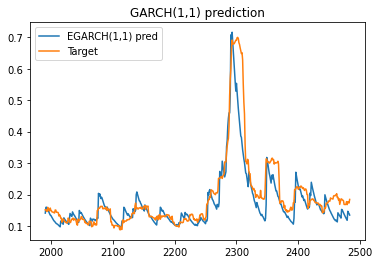

In [101]:
plt.plot(rolling_predictions1, label='GJR-GARCH(1,1) pred')
# plt.plot(rolling_predictions2, label='EGARCH(2,3) pred')
# plt.plot(rolling_predictions3, label='GARCH(3,3) pred')
plt.plot(data_cleaned['Target22'][testSize:], label='Target')
plt.title('GARCH(1,1) prediction')
plt.legend()
# plt.savefig("images/garch11.png")
plt.show()

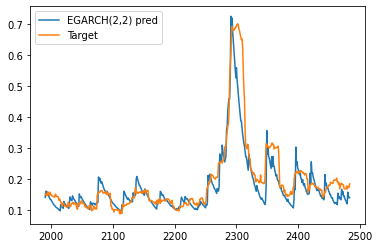

In [102]:
plt.plot(rolling_predictions2, label='GJR-GARCH(2,2) pred')
plt.plot(data_cleaned['Target22'][testSize:], label='Target')
plt.legend()
# plt.savefig("images/garch(1,1).png")
plt.show()

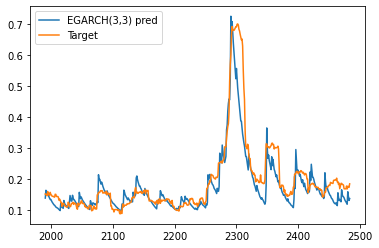

In [103]:
plt.plot(rolling_predictions3, label='GJR-GARCH(3,3) pred')
plt.plot(data_cleaned['Target22'][testSize:], label='Target')
plt.legend()
# plt.savefig("images/garch(1,1).png")
plt.show()


This model is EGARCH model which contains another additional value for capturing asymmetric
effects of financial dataset.

In [104]:
# egm_pred = []
# for i in range(testSize):
#     train = logreturns[:-(testSize-i)]*100
#     egm = arch_model(train,p=1,q=1, vol='egarch', dist='skewt')
#     model_fit = egm.fit(disp='off')
#     pred = model_fit.forecast(horizon=1)
#     egm_pred.append(np.sqrt(pred.variance.values[-1,:][0])*0.01*np.sqrt(252))

In [105]:
# egm_rolling_pred = pd.DataFrame(egm_pred, index=logreturns.index[-testSize:])
# plt.plot(egm_rolling_pred, label='pred')
# plt.plot(data_cleaned['Target22'].iloc[testSize:], label='Target')
# plt.legend()
# plt.show()

In [106]:
import metrics as mt

In [107]:
mt.testScore(rolling_predictions1, target)

test Score: 0.0026748881339782268 MSE
test Score: 0.051719320702985135 RMSE
test Score: 0.17062306057574483 MAPE
test Score: 0.8144670406481322 R2 score


In [108]:
mt.testScore(rolling_predictions2, target)

test Score: 0.0026624525228314453 MSE
test Score: 0.051598958544058285 RMSE
test Score: 0.1676195858957308 MAPE
test Score: 0.8153295872750748 R2 score


In [109]:
mt.testScore(rolling_predictions3, target)

test Score: 0.0026918476716267605 MSE
test Score: 0.05188301910670543 RMSE
test Score: 0.16838546012043784 MAPE
test Score: 0.8132907098815472 R2 score
